# Сборный проект

 Исследование продаж в интернет-магазине «Стримчик» для выявления закономерностей в продажах успешных компьютерных игр.  Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Также попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков». Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.\
Что нужно сделать:
- 1. Подготовить данные
- 2. Провести исследовательский анализ данных:
    - Посмотреть, сколько игр выпускалось в разные годы
    - Посмотреть, как менялись продажи по платформам
    - Определить лидеров продаж в актуальный период и посмотреть влияют ли оценки на продажи
    - Определить какой жанр больше всего пользуется популярностью
- 3. Описать портрет типичного пользователя: Северной Америки, Европы и Японии, а именно:
    - топ платформ
    - топ жанры
    - топ рейтинг игры
- 4. Проверка гипотез:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action и Sports  разные.

## Общая информация

In [1]:
# имбортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

In [2]:
# считываем файл
data = pd.read_csv('C:\\Users\\Дмитрий\\Downloads\\games.csv')

In [3]:
# на экран
display(data.head(10))
display(data.tail(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


столбцы с заглавных букв - неудобно, пропуски,  в столбце с оценкой пользователей какое-то непонятное - 'tbd'

In [4]:
# общая инфо
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


в столбцах: User_Score, Critic_Score  и Rating много пропусков, в  Year_of_Release тоже пропуски есть, но не много. В столбцах: Year_of_Release, User_Score, Critic_Score неправильный тип данных

In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
# проверим явные дубоикаты
data.duplicated().sum()

# дубликатов, к счастью, нет

0

## Подготовка данных

In [7]:
# столбцы к нижнему регистру
data.columns = data.columns.str.lower()

In [8]:
#check
data.head()

#все норм

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
# посмотрим что в столбце
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
# преобразуем типы в столбцах
data['year_of_release'] = data['year_of_release'].astype('int64', errors='ignore')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [11]:
# посмотрим что в столбце еше раз
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

выбрала эти столбцы, так как год - явно целое число должно быть, ну а оценка - число, а не объект.

в столбце 'user_score' было значение tbd - "to be determinated" (будет определено), для нас это тоже самое, что и нет оценки. Поэтому целесообразно применение errors='coerce'

In [12]:
#check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


тип поменялся только в оценке пользователей, ну ладно, изменим тип данных в годе релиза дальше, так как пропуски мешают

In [13]:
# посмотрим пропуски
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

По итогу: 6 столбцов с пропусками, два по мелочи, три - много пропусков, год релиза - терпимо. Дальше будем эти пропуски обрабатывать, иначе не дает поменять тип данных.
Вероятно, пропуски образовались из-за человеческого фактора, либо были утеряны при переносе данных

In [14]:
# посмотрим наглядно как выглядят пропуски в процентах 
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пропуски в процентах' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

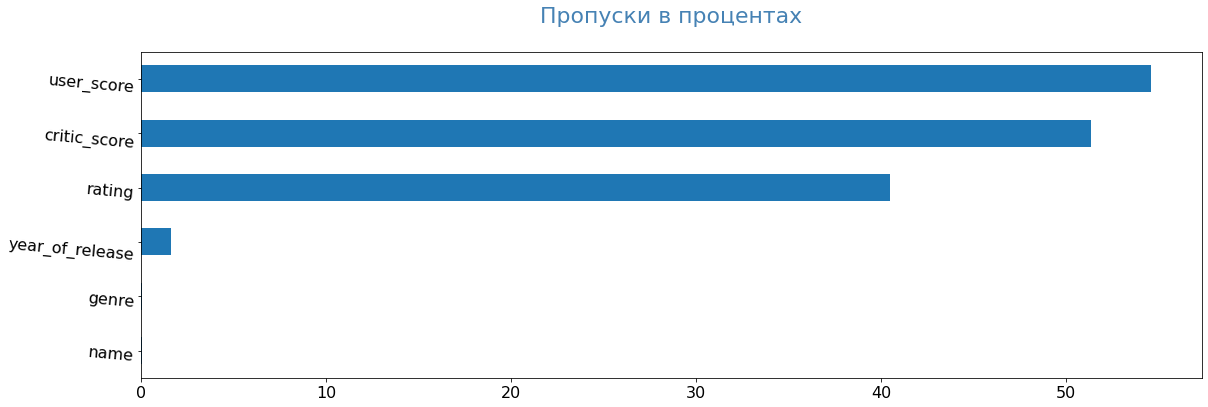

In [15]:
pass_value_barh(data)

со столбцом оценки критиков - караул

Пропуски в столбе name, year_of_release удалим, так как их мало. Оценки критиков и пользователей трогать не будем - ибо получим некорректные значения, на пропуски в столбце рейтинг - поставим заглушки

In [16]:
# рейтинг
data['rating'].unique()

#это категории - не заполнить, там какие особые критерии

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [17]:
# заполним пропуски в рейтинге заглушкой
data['rating'] = data['rating'].fillna('out')
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,out
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,out
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,out
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,out
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,out
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,out


In [18]:
# пропуски в столбце с годом релиза можно удалить, их немного
# заменим тип данных, а то выше не получилось

# Убираем предупреждения
import warnings
warnings.filterwarnings("ignore")

data = data.dropna(subset=['year_of_release'])
data['year_of_release'] = data['year_of_release'].astype('int64')


In [19]:
#check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16446 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [20]:
# тут вообще два пропуска только
data = data.dropna(subset=['name'])

In [21]:
# определим суммарные продажи
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [22]:
# check
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,out,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,out,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,out,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,out,28.31


В разделе провелась предобработка данных: 
- переименованы столбцы
- найдены и обработаны все пропуски
- изменен тип данных столбцов
- добавлен новый столбец - сумма всех продаж

## Исследовательский анализ данных

### Посмотрим сколько игр выпускалось в разные годы

In [23]:
# посмотрим сколько игр выпускалось в разные годы
count_games = data.groupby('year_of_release')['name'].count().sort_values(ascending=False)
print(count_games)

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: name, dtype: int64


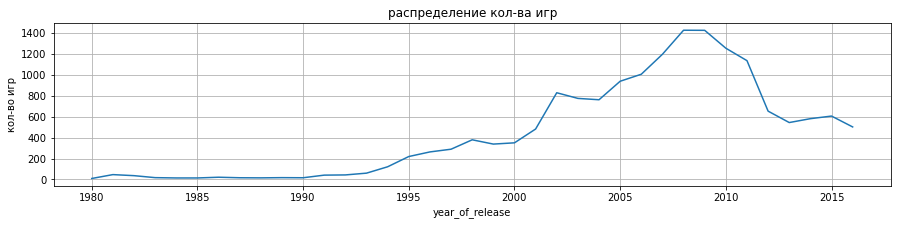

In [24]:
data.groupby('year_of_release')['name'].count().plot(x='year_of_release', y='name', grid=True, figsize=(15,3), title='распределение кол-ва игр', ylabel='кол-во игр');

однозначно видно, что пик приходится на 2008-2009 год, с 1980 по 1993 - копейки, но тогда и компьютеров не было особо - поэтому без этих данных можно и обойтись. С 2000 года активный рост кол-ва игр по 2009, а с 2011 резкий спад практически в два раза - в компьютер видимо уже мало кто играет, все в телефонах

In [25]:
# поэтому далее везде будем брать год, начиная с 1994, ибо раньше - неинформативно
data_1994 = data.query('year_of_release > 1994')
data_1994['year_of_release'].unique()

array([2006, 2008, 2009, 1996, 2005, 1999, 2007, 2010, 2013, 2004, 2002,
       2001, 2011, 1998, 2015, 2012, 2014, 1997, 2016, 2003, 2000, 1995],
      dtype=int64)

### Посмотрим изменения продаж в зависимости от платформы

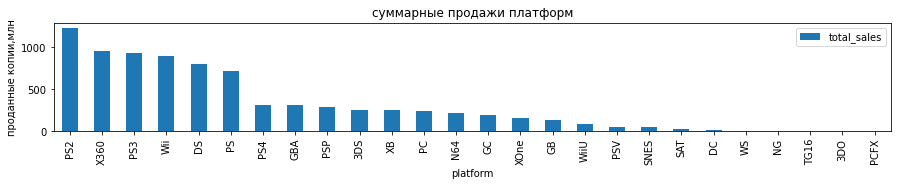

In [26]:
# вычислим наиболее популярные платформы
for_graph = data_1994.pivot_table(index='platform', values='total_sales', \
                             aggfunc=('sum')).sort_values(by='total_sales',ascending=False).plot(kind='bar', figsize=(15,2),\
                                                         title='суммарные продажи платформ', ylabel='проданные копии,млн')

# возьмем отсюда самых выдающихся по продажам с 1 по 6 позицию

In [27]:
# создадим список из топ-6, чтобы дальше его задейстововать в срезе для графика

list = ["PS2", "X360", "PS3", "Wii", "DS", "PS"]

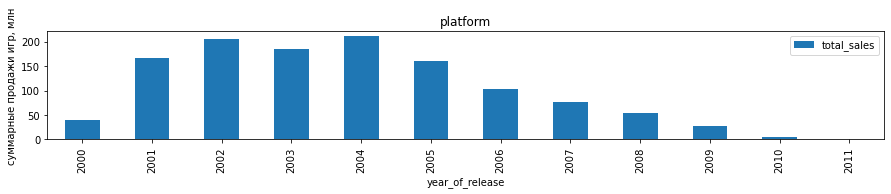

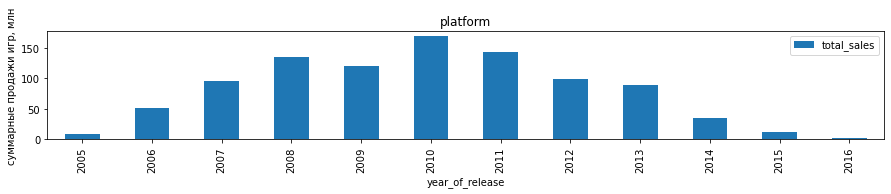

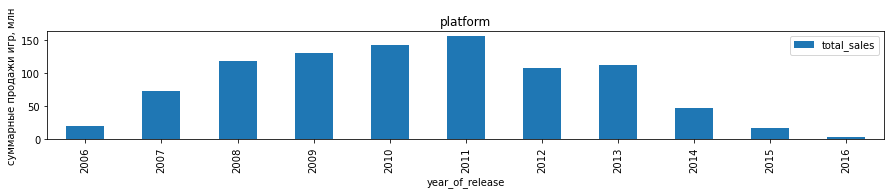

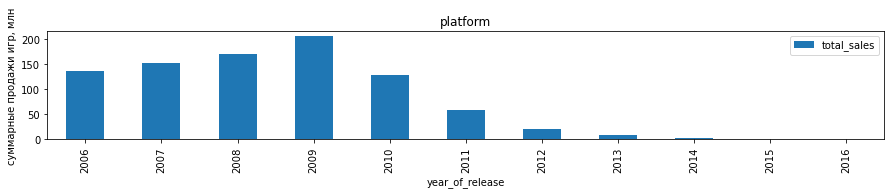

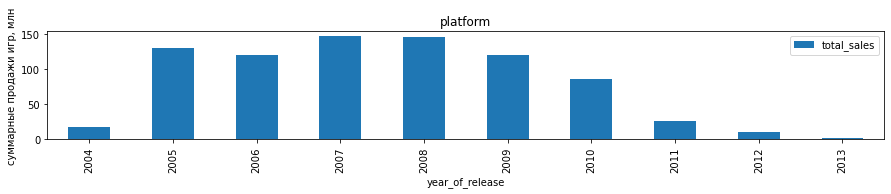

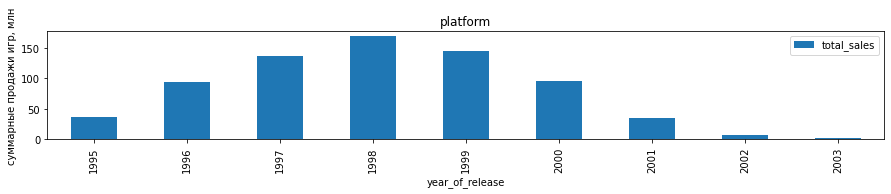

In [28]:
# строим графики по порядку для платформ из списка
for platform in list:
    data_1994[data_1994['platform']==platform].pivot_table(index='year_of_release', values='total_sales',\
                                                 aggfunc=('sum')).plot(kind='bar', title='platform', figsize=(15,2), ylabel='суммарные продажи игр, млн')

По графикам видно, что платформы в среднем существуют 10 лет.
Пик их продаж наступает на 4-5 год после первого выпуска.

### Анализ платформ за актуальный период

In [29]:
# актуальный период возьмем с 2013 года, учитывая, что прогноз нужно на 2017 год
actual_data = data.query('year_of_release >= 2013')

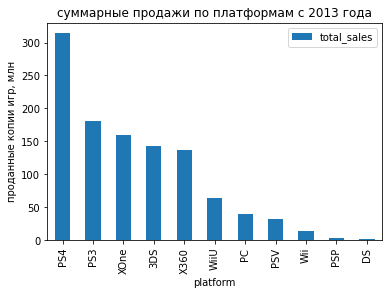

In [30]:
# график суммарных продаж по платформам в актуальный период
actual_data.pivot_table(index='platform', values='total_sales', aggfunc=('sum')).\
                                sort_values(by='total_sales', ascending=False)\
                                .plot(kind='bar', title='суммарные продажи по платформам с 2013 года', ylabel='проданные копии игр, млн');

лидеры, безусловно, PS4, PS3, XOne, 3DS, X360.

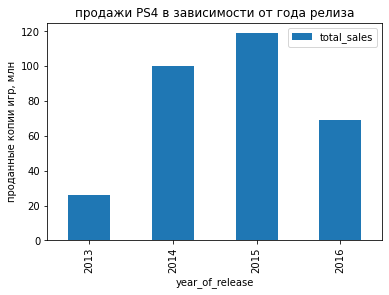

In [31]:
# посмотрим растут продажи или нет на примере PS4
actual_data.query('platform=="PS4"').pivot_table(index='year_of_release', values='total_sales', aggfunc=('sum'))\
        .plot(kind='bar', title='продажи PS4 в зависимости от года релиза', ylabel='проданные копии игр, млн');

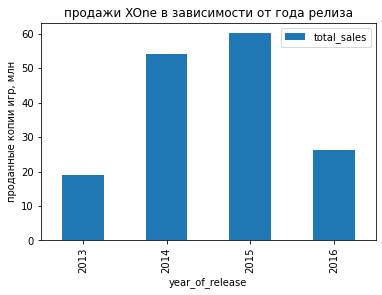

In [32]:
# посмотрим растут продажи или нет на примере XOne
actual_data.query('platform=="XOne"').pivot_table(index='year_of_release', values='total_sales', aggfunc=('sum'))\
        .plot(kind='bar', title='продажи XOne в зависимости от года релиза', ylabel='проданные копии игр, млн');

на примере двух топовых платформ увидели, что продажи копий резко упали в 2016 году

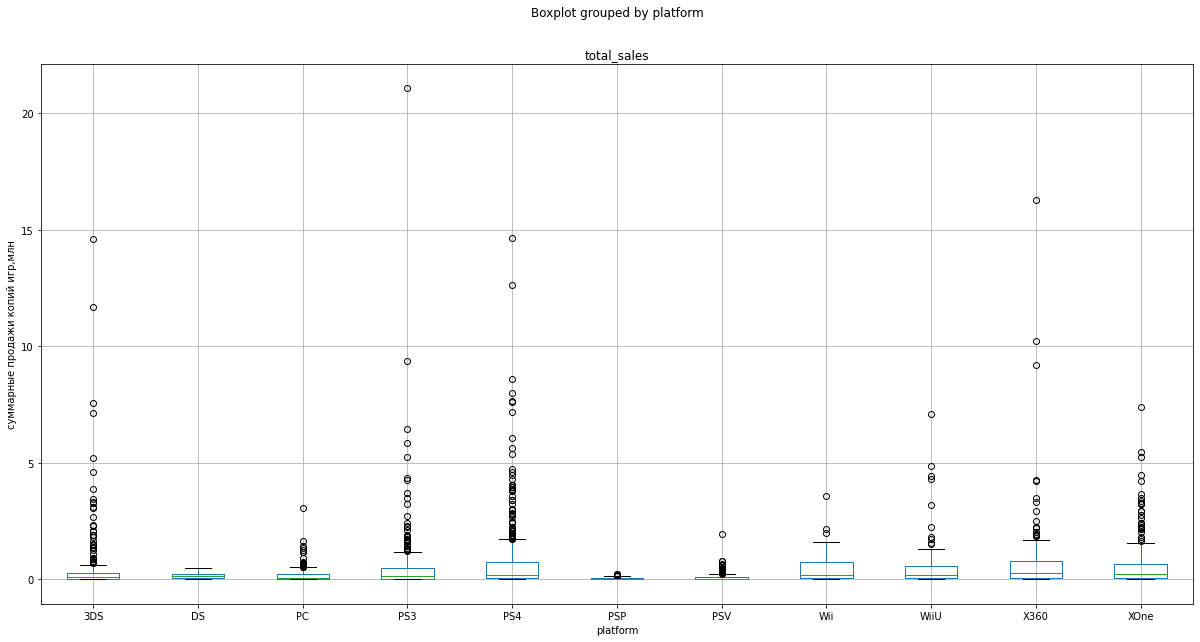

In [33]:
# строим ящик с усами для всех платформ в актуальный период
actual_data.boxplot('total_sales', by='platform', figsize=(20,10)).set(ylabel='суммарные продажи копий игр,млн');

по графику можно увидеть, что большинство продаж у PS4, меньше всего - PSP, видим редкие выбросы - единичные точки более 10 млн (наверное очень популярные игры, но их очень мало). Также достаточно выбросов в диапазоне от 5 млн до 10 млн - предлагаю увеличить масштаб графика

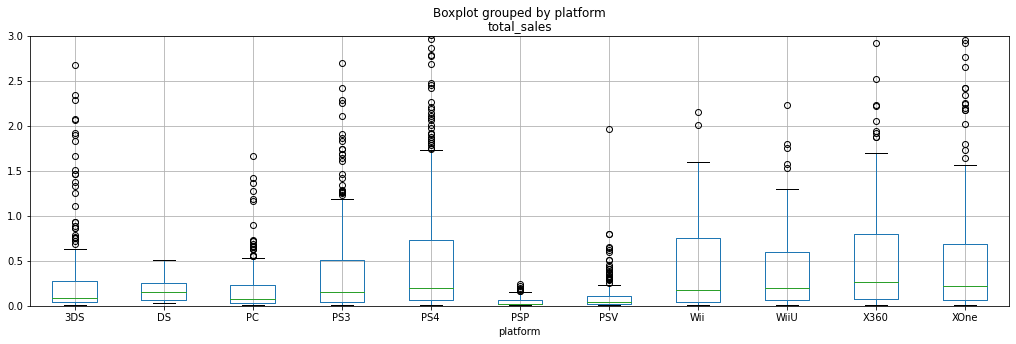

In [34]:
# строим ящик с усами в масштабе для всех платформ в актуальный период
actual_data.boxplot('total_sales', by='platform', figsize=(17,5)).set(ylim=(0,3));

Ящики PS4, Wii и X360 очень схожи, но медианна X360 чуть больше, но все они находятся на уровне примерно 0.25 млн. Тенденция к скошенности вправо. PSP и PSV прижало к нулю

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

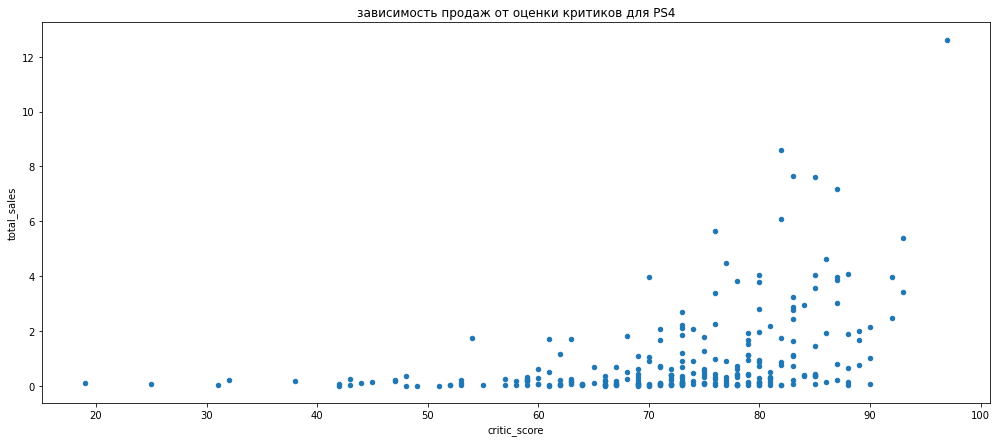

In [35]:
# выберем самую популярную - PS4
#график зависимости продаж от оценки критиков
actual_data.query('platform == "PS4"').\
    plot(kind='scatter', x='critic_score', y='total_sales', figsize=(17,7), title='зависимость продаж от оценки критиков для PS4');

чем выше оценка - тем больше продаж

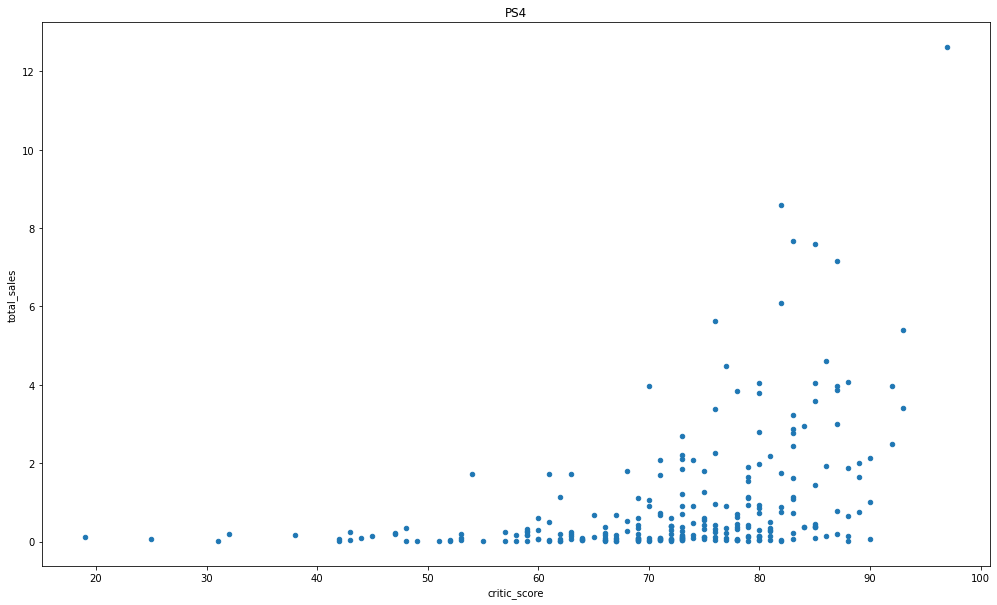

In [36]:
# Комментарий ревьюера
actual_data.query('platform == "PS4"').plot(kind='scatter', x='critic_score', y='total_sales', figsize=(17,10), title='PS4');

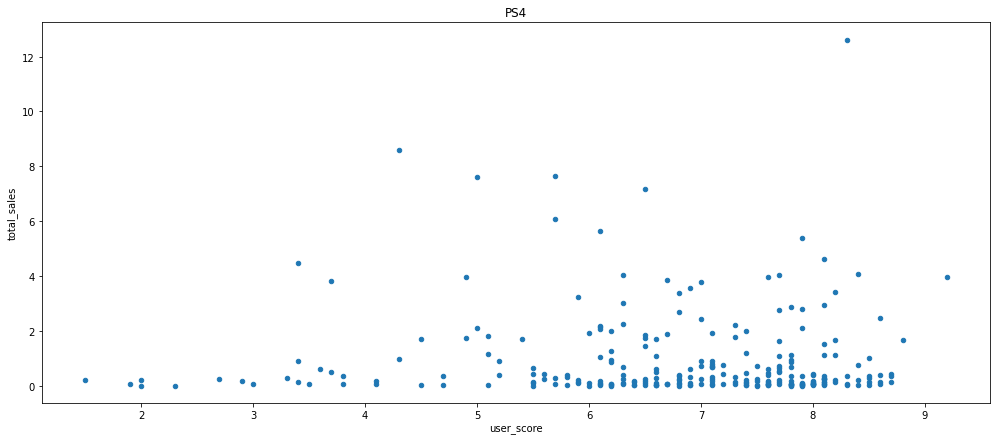

In [37]:
#график зависимости продаж от оценки покупателей
actual_data.query('platform == "PS4"').plot(kind='scatter', x='user_score', y='total_sales', figsize=(17,7), title='PS4');

что-то тоже похожее на слабую зависимость, чем выше оценка - больше продажи

In [38]:
# корреляция
actual_data.query('platform=="PS4"')['total_sales'].corr(actual_data.query('platform=="PS4"')['user_score'])

# тут вылез минус, якобы при увеличении одной величины - другая уменьшается, но число слишком маленькое

-0.031957110204556424

In [39]:
# корреляция
actual_data.query('platform=="PS4"')['total_sales'].corr(actual_data.query('platform=="PS4"')['critic_score'])

0.406567902061781

и по графикам и по корреляции видно, что связь в случае с оценкой критиков и продажами - не сильная, но всё же прослеживается. Чем выше балл - тем больше продаж. Между оценкой пользователей и продажами связи нет совсем.

 Соотнесём выводы с продажами игр на других платформах, для этого проверим еще несколько платформ

In [40]:
# создадим список платформ, чтобы его использовать далее
list_corr=['PS3', 'XOne', '3DS', 'X360', 'PC']

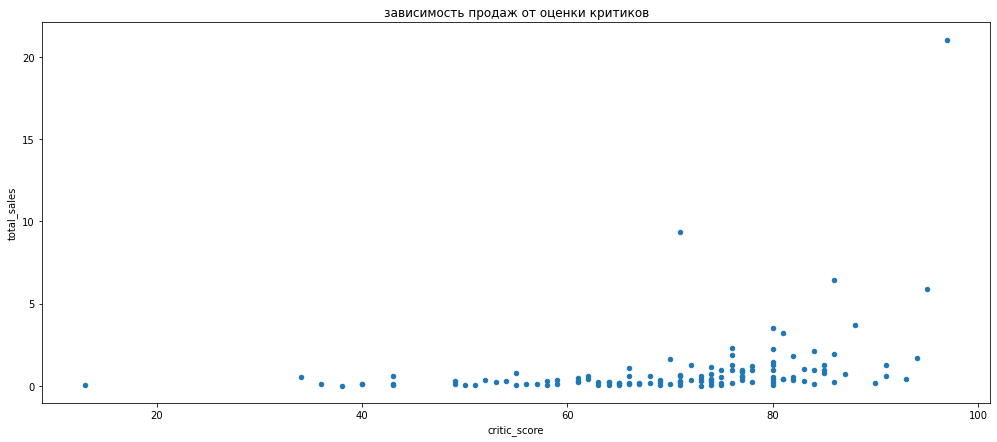

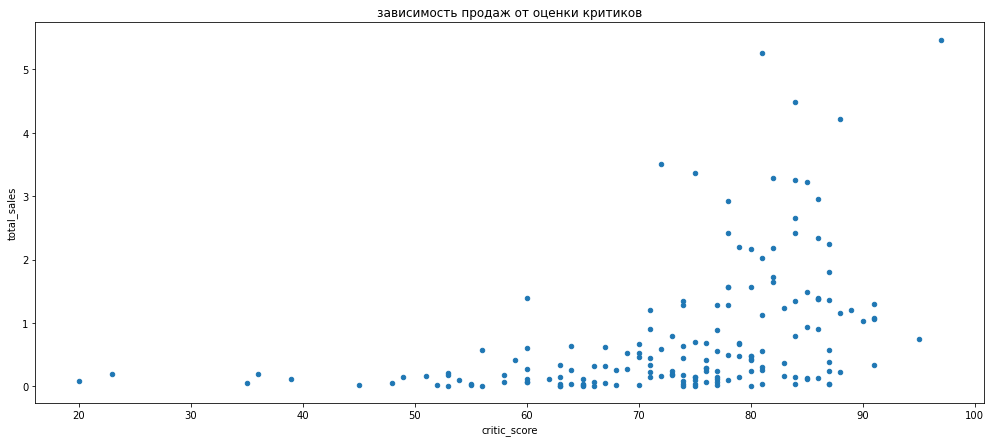

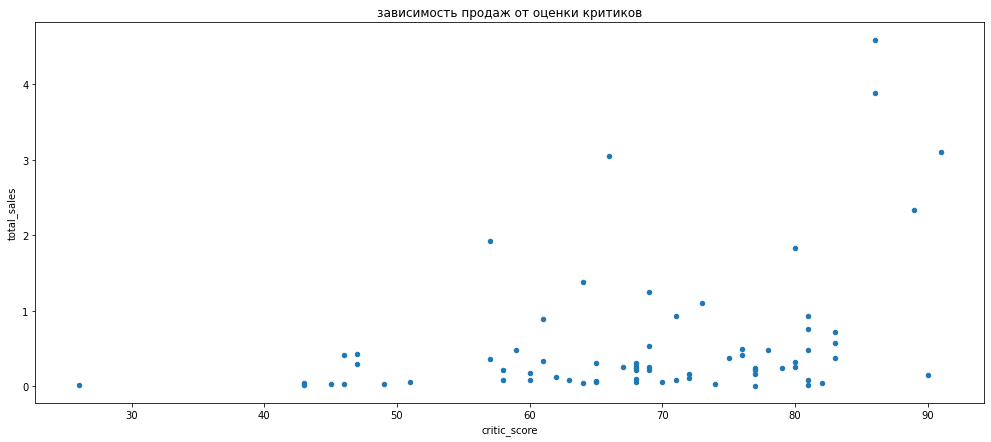

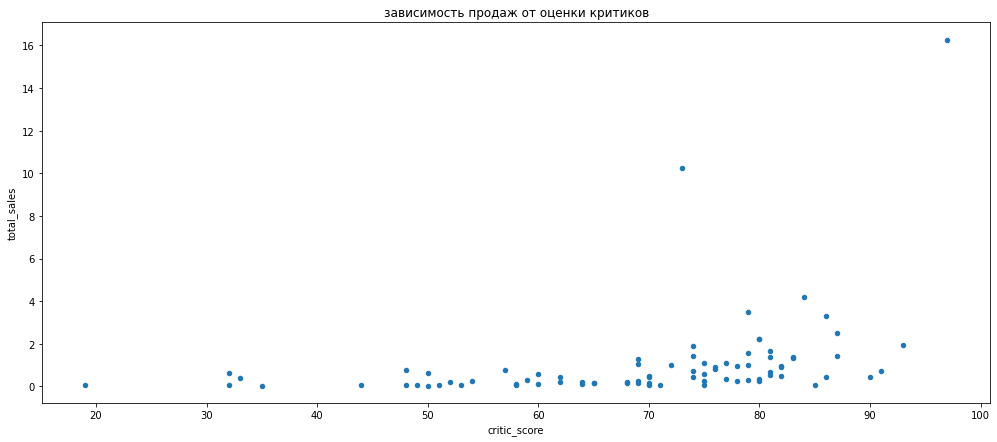

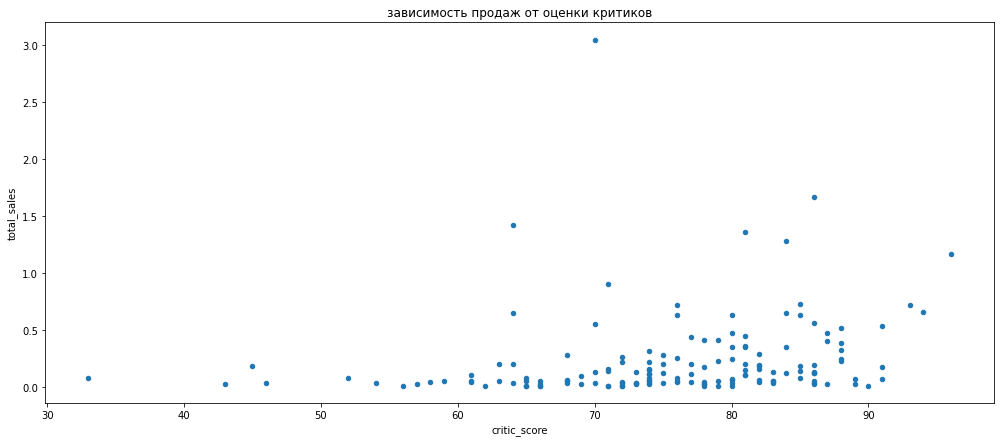

In [41]:
# построим графики зависимости от оценки критиков для платформ из списка
for platform in list_corr:
    actual_data[actual_data['platform'] == platform].plot(kind='scatter', x='critic_score', y='total_sales', figsize=(17,7), title='зависимость продаж от оценки критиков');

хорошо видно зависимость на 2 графике

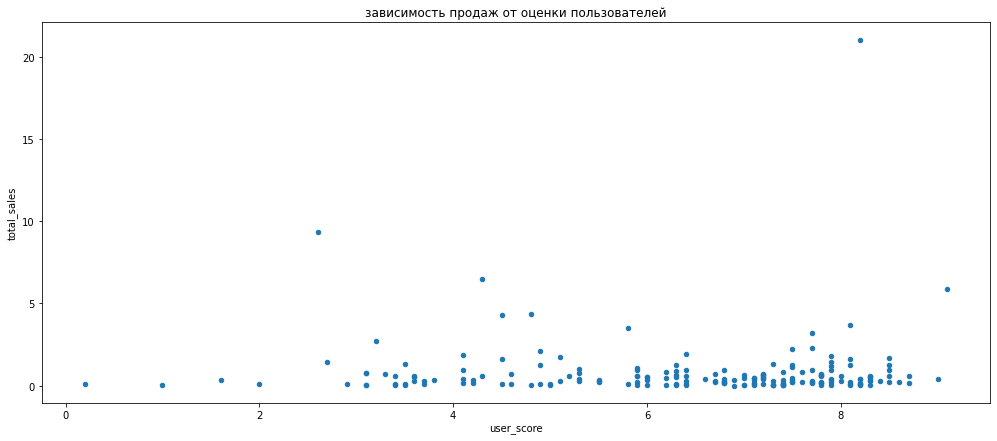

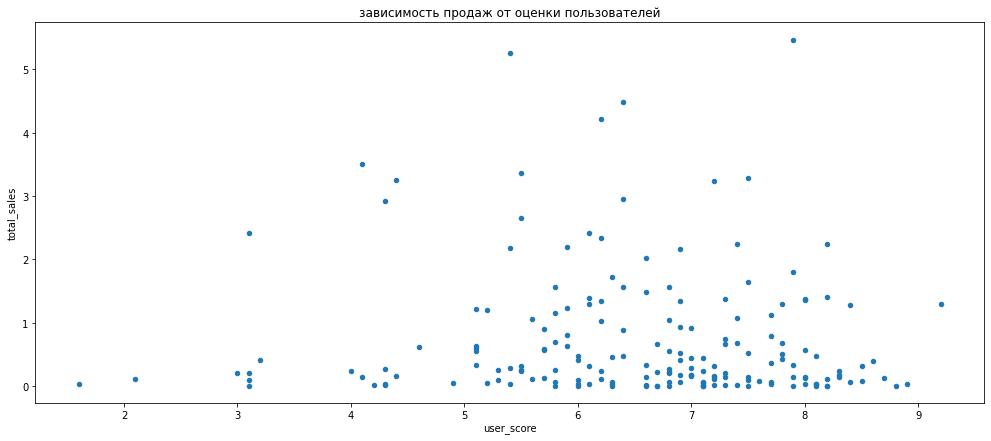

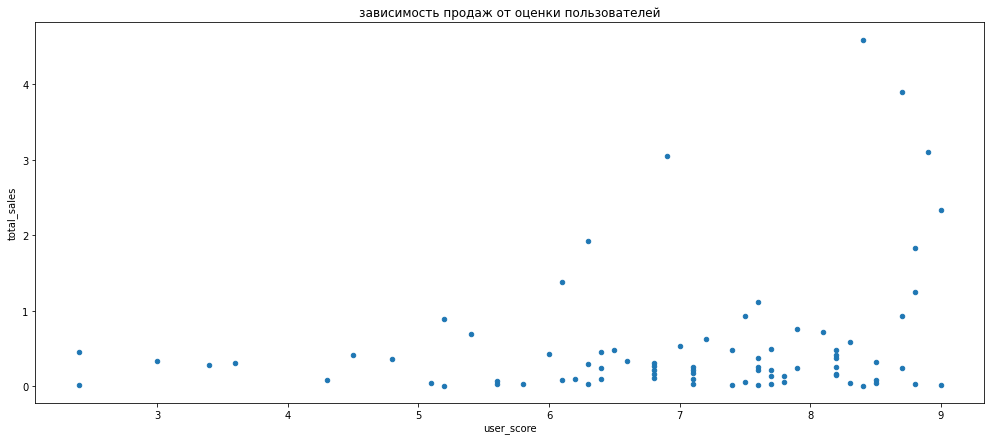

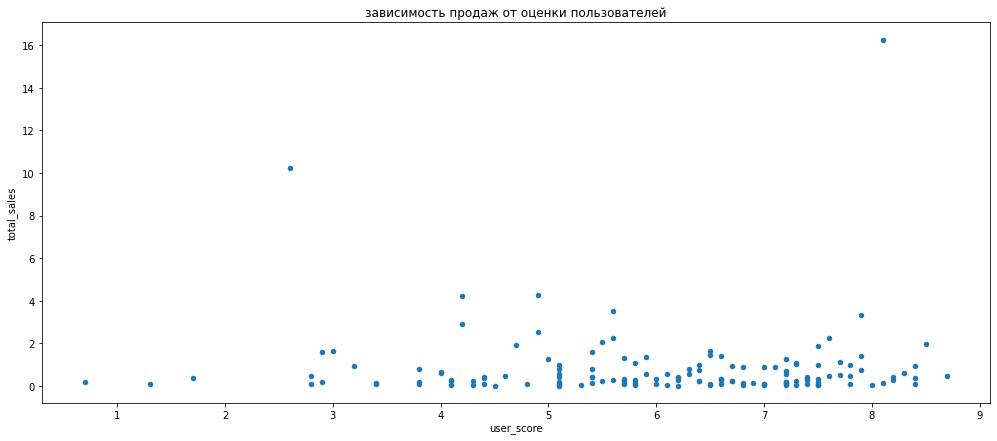

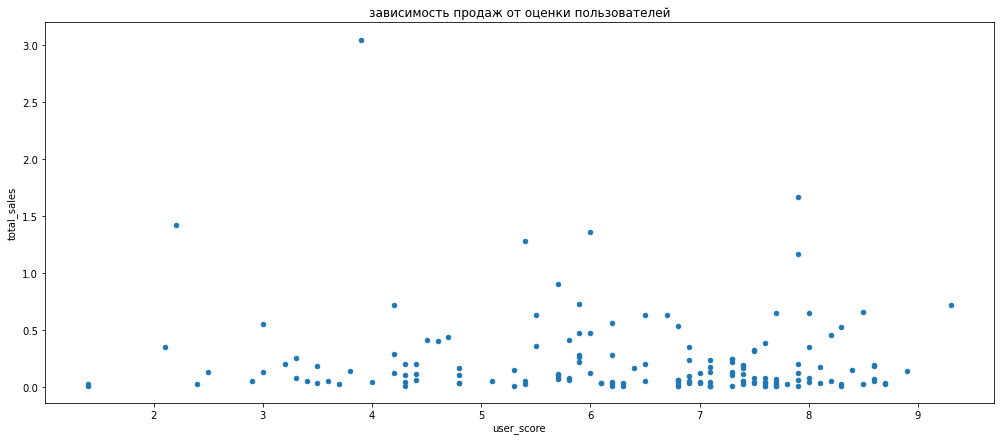

In [42]:
# построим графики зависимости от оценки пользователей для платформ из списка
for platform in list_corr:
    actual_data[actual_data['platform'] == platform].plot(kind='scatter', x='user_score', y='total_sales', figsize=(17,7), title='зависимость продаж от оценки пользователей');

In [43]:
# посчитаем корреляцию для платформ из списка:
for platform in list_corr:
    a = actual_data[actual_data['platform']==platform]['user_score'].corr(actual_data[actual_data['platform']==platform]['total_sales'])
    print(a)

0.0023944027357566925
-0.06892505328279414
0.24150411773563016
-0.011742185147181342
-0.0938418695247674


In [44]:
# посчитаем корреляцию для платформ из списка:
for platform in list_corr:
    a = actual_data[actual_data['platform']==platform]['critic_score'].corr(actual_data[actual_data['platform']==platform]['total_sales'])
    print(a)

0.3342853393371919
0.4169983280084017
0.3570566142288103
0.3503445460228664
0.19603028294369382


в итоге: cредняя степень зависимости прослеживается только от оценки критиков, в остальных случаях -  зависимости нет

### Посмотрим на общее распределение игр по жанрам

In [45]:
# создадим сводную таблицу 
actual_data.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


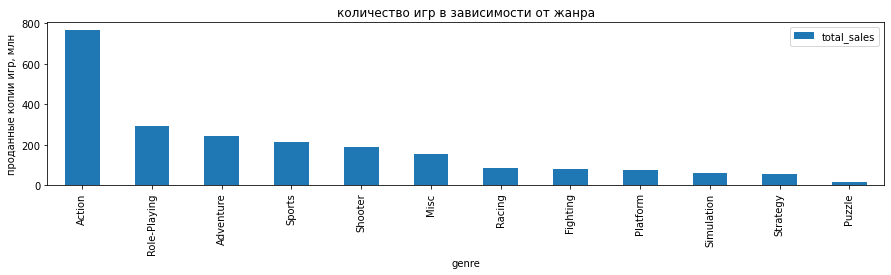

In [46]:
actual_data.pivot_table(index='genre', values='total_sales', aggfunc='count').\
                                sort_values(by='total_sales', ascending=False).\
                                    plot(kind='bar', figsize=(15,3), title='количество игр в зависимости от жанра', ylabel='проданные копии игр, млн');

больше всего выпускается экшновских игр, больше практически в 4 раза, чем второе место - ролевые игры. меньше всего выпускают пазлы

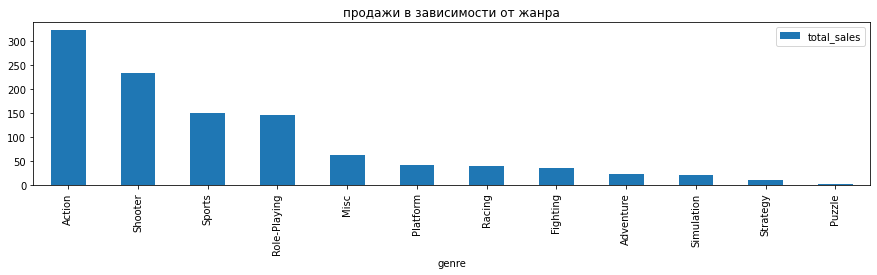

In [47]:
# посмотрим на графике для наглядности
actual_data.pivot_table(index='genre', values='total_sales', aggfunc='sum').\
                                sort_values(by='total_sales', ascending=False).\
                                    plot(kind='bar', figsize=(15,3), title='продажи в зависимости от жанра');

больше всего приносит прибыль жанр - экшн, но их и выпускается больше всего. Поэтому посмотрим медиану

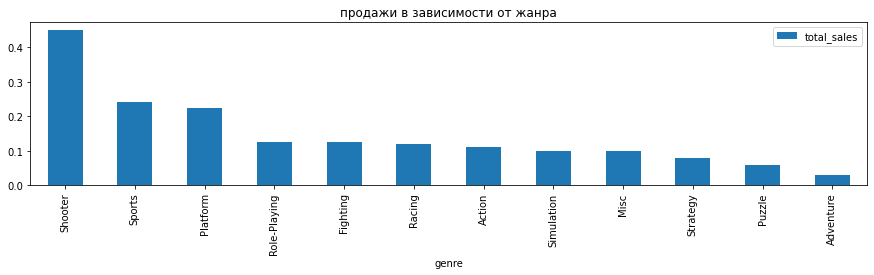

In [48]:
# правильнее будет смотреть медиану
actual_data.pivot_table(index='genre', values='total_sales', aggfunc='median').\
                                sort_values(by='total_sales', ascending=False).\
                                    plot(kind='bar', figsize=(15,3), title='продажи в зависимости от жанра');

по медиане - а это значит стабльный доход, лидер - стрелялки, его медианные продажи в два раза больше спортивных игр.Меньше прибыли у приключений

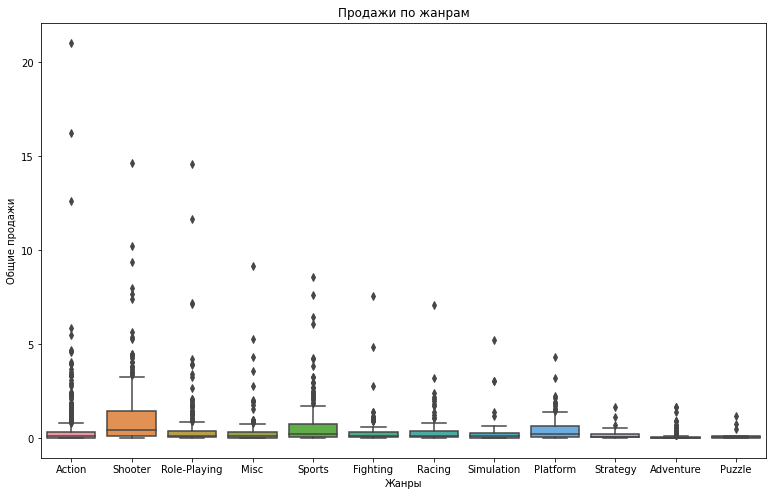

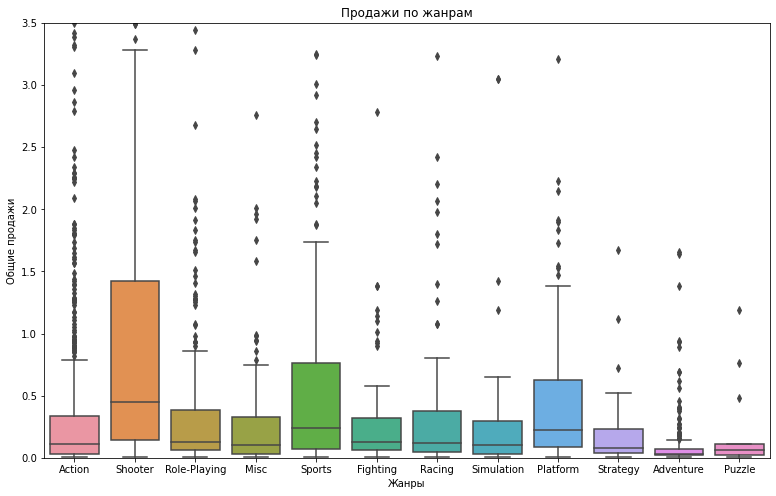

In [49]:
# посмотрим на боксплот
import seaborn as sns
data_temp, y = actual_data, 'total_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='genre')
    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='genre')
    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи', ylim=(0, 3.5)))
plt.show()

однозначно видно лидера продаж - стрелялки (shooter) с медианной около 400 тыс, это значит,  что в основном этот жанр игр приносит такую прибыль. меньше всего прибыльность у приключений (adventure) - что-то близкое к нулю

Вывод по разделу:
- больше всего игр выпускалось в 2008-2009 год, с 1980 по 1993 - очень мало, но тогда и компьютеров не было особо - поэтому без этих данных можно и обойтись. С 2000 года имелся активный рост кол-ва игр вплоть по 2009, а с 2011 резкий спад в два раза - теперь играют больше в телефонах
- средняя жизнь платформы составляет 10 лет. Пик их продаж наступает на 4-5 год выпуска
- начиная с 2007 года в лидерах продаж:  PS4, PS3, XOne, 3DS, X360, но продажи не сильно зависят от оценки критиков, а от оценки пользователей и не зависят вовсе 
- самое большее количество игр выпускает жанр - экшен
- а самый прибыльным и наоборот жанрами оказались - шутер и приключения соответственно       

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):

### Смотрим жителя Северной Америки

#### Топ-5 платформ

In [50]:
# самые популярные платформы (топ-5)
top5_na = actual_data.pivot_table(index='platform', values='na_sales', aggfunc=('sum')).\
        sort_values(by='na_sales', ascending=False).head(5)
print(top5_na)

          na_sales
platform          
PS4         108.74
XOne         93.12
X360         81.66
PS3          63.50
3DS          38.20


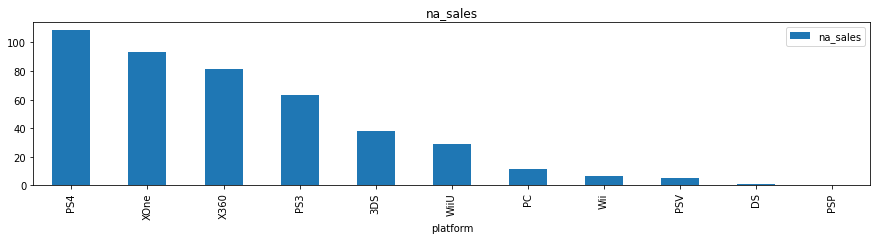

In [51]:
actual_data.pivot_table(index='platform', values='na_sales', aggfunc=('sum')).\
        sort_values(by='na_sales', ascending=False).plot(kind='bar', figsize=(15,3), title='na_sales');

топ-5 в Северной Америке выглядит так: PS4, XOne, X360, PS3, 3DS. Причем между 1 и 2 местом не такая уж и большая разница

#### Топ-5 жанров

In [52]:
top5_na_genre = actual_data.pivot_table(index='genre', values='na_sales', aggfunc=('sum')).\
                        sort_values(by='na_sales', ascending=False).head(5)
print(top5_na_genre)

              na_sales
genre                 
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49


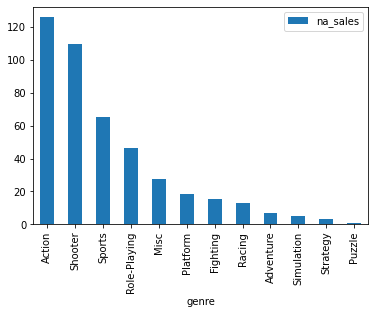

In [53]:
actual_data.pivot_table(index='genre', values='na_sales', aggfunc=('sum')).\
                sort_values(by='na_sales', ascending=False).plot(kind='bar');

самые популярные жанры - экшн, шутер, спорт, ролевые игры и аркада. У лидера небольшой отрыв от второго места.

In [54]:
actual_data.pivot_table(index='rating', values='na_sales', aggfunc=('sum')).\
                sort_values(by='na_sales', ascending=False)

,na_sales
rating,
M,165.21
out,89.42
E,79.05
E10+,54.24
T,49.79


в лидерах рейтинга - М, out, Е. Игры с рейтингом М(«Mature») — «Для взрослых» - намного больше продаются, следом out - игры не относящиеся ни к одной категории, далее - E («Everyone») — 'Для всех'

### Смотрим жителя Европы

#### Топ-5 платформ

In [55]:
# самые популярные платформы (топ-5)
top5_eu = actual_data.pivot_table(index='platform', values='eu_sales', aggfunc=('sum')).\
        sort_values(by='eu_sales', ascending=False).head(5)
print(top5_eu)

          eu_sales
platform          
PS4         141.09
PS3          67.81
XOne         51.59
X360         42.52
3DS          30.96


топ-5 платформ в Европе: PS4, PS3, XOne, X360, 3DS

#### Топ-5 жанров

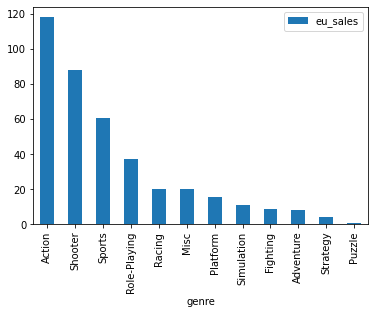

In [56]:
actual_data.pivot_table(index='genre', values='eu_sales', aggfunc=('sum')).\
                sort_values(by='eu_sales', ascending=False).plot(kind='bar');

топ-5 жанров: экшн, шутер, спорт, ролевые игры и гонки

In [57]:
# посмотрим влияние рейтинга
actual_data.pivot_table(index='rating', values='eu_sales', aggfunc=('sum')).\
                sort_values(by='eu_sales', ascending=False)

,eu_sales
rating,
M,145.32
E,83.36
out,78.91
E10+,42.69
T,41.95


самые продающиеся  - те же самые, что и у американцев, только 2 и 3 позиция поменены местами

Типичный житель Европы любит платформы: PS4, PS3, XOne, X360, 3DS
А топ-5 жанров выглядит так: экшн, шутер, спорт, ролевые игры и гонки


### Смотрим жителя Японии

#### Топ-5 платформ

In [58]:
# самые популярные платформы (топ-5)
top5_jp = actual_data.pivot_table(index='platform', values='jp_sales', aggfunc=('sum')).\
        sort_values(by='jp_sales', ascending=False).head(5)
print(top5_jp)

          jp_sales
platform          
3DS          67.81
PS3          23.35
PSV          18.59
PS4          15.96
WiiU         10.88


топ-5 платформ: 3DS, PS3, PSV, PS4, WiiU

#### Топ-5 жанров

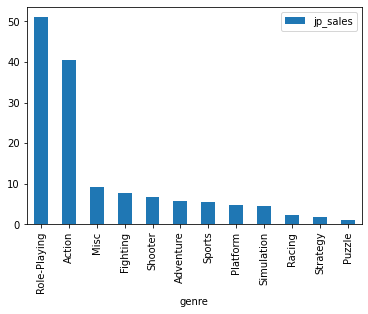

In [59]:
actual_data.pivot_table(index='genre', values='jp_sales', aggfunc=('sum')).\
                sort_values(by='jp_sales', ascending=False).plot(kind='bar');

А у японцев в лидерах платформ: 3DS, PS3, PSV, PS4, WiiU
а жанры - ролевые игры, экшн, аркада, драки и шутер.

In [60]:
# посмотрим влияние рейтинга
actual_data.pivot_table(index='rating', values='jp_sales', aggfunc=('sum')).\
                sort_values(by='jp_sales', ascending=False)

,jp_sales
rating,
out,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


лидеры продаж категории out, T, E

У японцев те же самые лидеры, что и у европейцев с американцами.

Вывод по разделу:
- американцы предпочитают: 
    - платформы: PS4, XOne, X360, PS3, 3DS
    - жанры: экшн, шутер, спорт, ролевые игры и аркада
    - больше всего покупают игр с рейтингом М, out, Е
- европейцы:
    - платформы: PS4, PS3, XOne, X360, 3DS
    - жанры: экшн, шутер, спорт, ролевые игры и гонки
    - больше всего покупают игр с рейтингом M, out, E
- японцы:
    - платформы: 3DS, PS3, PSV, PS4, WiiU
    - жанры: ролевые игры, экшн, аркада, драки и шутер.
    - больше всего покупают игр с рейтингом out, T, E
    
 Что можно сказать: у европейцев и американцев схожий вкус - это касается и платформ и жанров. Японцы немного выделяются) Но все они сходятся в PS3, PS4, 3DS в ролевых играх с экшеном и стрелялками и в играх рейтинга Е

##  Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: 
Н0 - Средние пользовательские рейтинги платформ Xbox One и PC равны. \
Альтернативная гипотеза:
Н1 - Средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [61]:
# проверим нулевую гипотезу
# для начала найдем пользовательский рейитнг платформы XOne
xone_h = actual_data[actual_data['platform']=='XOne']['user_score']
xone_h

99       NaN
165      7.9
179      5.4
242      6.4
270      6.2
        ... 
16630    8.2
16643    6.6
16645    NaN
16660    6.7
16672    NaN
Name: user_score, Length: 247, dtype: float64

In [62]:
# посмотрим средний пользовательский рейтинг XOne
actual_data.query('platform == "XOne"').pivot_table(index='platform', values='user_score')


,user_score
platform,
XOne,6.521429


In [63]:
# найдем средний пользовательский рейитнг платформы PC
pc_h = actual_data[actual_data['platform']=='PC']['user_score']
print(pc_h)

458      3.9
1095     7.9
1351     2.2
1437     6.0
1530     5.4
        ... 
16509    7.9
16518    1.4
16617    NaN
16631    NaN
16692    7.6
Name: user_score, Length: 189, dtype: float64


In [64]:
# посмотрим средний пользовательский рейтинг PC
actual_data.query('platform == "PC"').pivot_table(index='platform', values='user_score')

,user_score
platform,
PC,6.269677


In [65]:
# проверка гипотезы

alpha = 0.01
results = st.ttest_ind(xone_h.dropna(), pc_h.dropna())
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
     print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


P-значение больше порогового значения. Нулевая гипотеза не отвергнута, а это значит, что гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC равны" - верна. Что и видно по подсчитанному среднему.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Нулевая гипотеза:
Н0 - Средние пользовательские рейтинги жанров Action и Sports равны. \
Альтернативная гипотеза:
Н1 - Средние пользовательские рейтинги жанров Action и Sports не равны.

In [66]:
# для начала найдем пользовательский рейитнг жанра action
action_h = actual_data[actual_data['genre']=='Action']['user_score']
print(action_h)

16       8.2
23       8.1
42       8.3
149      9.1
165      7.9
        ... 
16680    NaN
16691    NaN
16692    7.6
16699    NaN
16710    NaN
Name: user_score, Length: 766, dtype: float64


In [67]:
# посмотрим на среднюю оценку пользователей жанра экшн
actual_data.query('genre=="Action"').pivot_table(index='genre', values='user_score')

,user_score
genre,
Action,6.837532


In [68]:
# найдем пользовательский рейитнг жанра sports
sports_h = actual_data[actual_data['genre']=='Sports']['user_score']
print(sports_h)

77       4.3
94       5.0
126      4.3
143      5.7
264      4.5
        ... 
16428    NaN
16450    4.5
16518    1.4
16638    NaN
16643    6.6
Name: user_score, Length: 214, dtype: float64


In [69]:
# посмотрим на среднюю оценку пользователей жанра спорт
actual_data.query('genre=="Sports"').pivot_table(index='genre', values='user_score')

,user_score
genre,
Sports,5.238125


In [70]:
# проверяем нулевую гипотезу
alpha = 0.01
results = st.ttest_ind(action_h.dropna(), sports_h.dropna(), equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
     print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Р-значение меньше порогового значения альфа на 18 порядков , а это значит, что нулевую гипотезу "Средние пользовательские рейтинги жанров Action и Sports равны" - отвергаем. То есть верна альтернативная гипотеза, что  и видно по посчитанным срежним значениям.

Нулевые гипотезы выбирались исходя из текста задания, альтернативная - в противоположность нулевой гипотезе. Для проверки гипотез о равенстве среднего двух генеральных совокупностей по взятым из них выборкам использовался метод: scipy.stats.ttest_ind. Получаемый результат (р-величина) - вероятность получить наблюдаемый результат при условии, что нулевая гипотеза верна, сравнивали с выбранным уровнем значимости и выносили решение: отвергать гипотезу или нет. Альфа выбиралась из общепринятых пороговых значений — 5% и 1%.

## Общий вывод

Изучались исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) в интернет магазине "Стримчик". Задача заключалась в выявлении определяющих успешность игры закономерностей. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.\
Конретно выполнено:
- 1. предобработка данных:
    - перевод столбцов таблицы в нижний регистр
    - найдены пропуски и обработаны те, с которыми это делать было уместно
    - изменен некорректный тип данных в столбцах year_of_release, user_score
    - добавлен новый столбец - сумма всех продаж total_sales
- 2. проведен исследовательский анализ данных:
    - с 1980 по 1993 - было очень мало игр (компьютеры не тянули), пик выпуска игр приходился на 2008-2009 год, а с 2011 наблюдался резкий спад практически в два раза - телефонные игры нынче популярны
    -  обнаружен топ-6 игровых платформ: "PS2", "X360", "PS3", "Wii", "DS", "PS" со средней продолжительностью существования - 10 лет
    - но в актуальное время (с 2013) лидеры немного сменились - PS4, PS3, XOne, 3DS, X360.
    - на продажи влияют оценки критиков, видимо люди всё таки прислушиваются к профессионалам, но оценки пользователей роли не играют
    - больше всего выпускается игр с жанром action, но дороже продается - shooter
    
- 3. проанализирован портрет представителя: Северной Америки, Европы и Японии
    - Северная Америка:
       - топ-5 платформ выглядит так: PS4, XOne, X360, PS3, 3DS
       - самые популярные жанры - экшн, шутер, спорт, ролевые игры и аркада
       - в лидерах рейтинга -M, out, E
     - Европа:
         - топ-5 платформ в Европе: PS4, PS3, XOne, X360, 3DS
         - топ-5 жанров: экшн, шутер, спорт, ролевые игры и гонки
         - самые продающиеся  - те же самые , только 2 и 3 место поменялись местами.
     - Япония:
         - топ-5 платформ: 3DS, PS3, PSV, PS4, WiiU
         - жанры - ролевые игры, экшн, аркада, драки и шутер.
         - лидеры продаж в категориях: out, T, E
у европейцев и американцев схожий вкус - это касается и платформ и жанров. Японцы немного выделяются) Но все они сходятся в PS3, PS4, 3DS в ролевых играх с экшеном и стрелялками и в играх рейтинга Е

- 4. проверка гипотез:\
проверялись две гипотезы при помощи специального метода для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. В итоге еще раз убедились, что средние пользовательские рейтинги платформ Xbox One и PC равны, а средние пользовательские рейтинги жанров Action и Sports разные.\
\
И по итогу проделанной работы можно сказать, что следует вкладываться в лидера рынка: PS4 , поскольку он пользуется наибольшей популярностью в Европе и Америке, в жанр - shooter, поскольку он стабильно приносит хороший доход, и в игры рейтинга M. А если обращать внимание на отзывы, то только на отзывы критиков.